# Imports

In [1]:
import os
import logging
import pandas as pd
import datetime
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
from matplotlib.pyplot import Polygon
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MinuteLocator
import matplotlib.ticker as ticker

try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

try:
    from PT3S import Rm
except:
    import Rm

In [2]:
pt3s_path = os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))

# Logging

In [3]:
logger = logging.getLogger()  

logFileName= r"Example2.log" 

loglevel = logging.DEBUG
logging.basicConfig(filename=logFileName
                        ,filemode='w'
                        ,level=loglevel
                        ,format="%(asctime)s ; %(name)-60s ; %(levelname)-7s ; %(message)s")    

fileHandler = logging.FileHandler(logFileName)     

logger.addHandler(fileHandler)

consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(logging.Formatter("%(levelname)-7s ; %(message)s"))
consoleHandler.setLevel(logging.INFO)
logger.addHandler(consoleHandler)

# Model

In [4]:
dbPath="C:\\3S\\SIR 3S\\Modelle\\Beispiele\\Wasser\\Manual\\Modellstände\\"

In [5]:
dbFilename="Beispiel_Wasser_STAND9"

# Read Model and Results

In [6]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=os.path.join(dbPath+dbFilename+'.db3') #XML converted to db3 
                                ,preventPklDump=True
                               )

INFO    ; Dx.__init__: dbFile (abspath): C:\3S\SIR 3S\Modelle\Beispiele\Wasser\Manual\Modellstände\Beispiel_Wasser_STAND9.db3 exists readable ...
INFO    ; dxAndMxHelperFcts.readDxAndMx: ..\..\..\..\..\3S\SIR 3S\Modelle\Beispiele\Wasser\Manual\Modellstände\Beispiel_Wasser_STAND9.db3 is newer than ..\..\..\..\..\3S\SIR 3S\Modelle\Beispiele\Wasser\Manual\Modellstände\WDBeispiel_Wasser_STAND9\B1\V0\BZ1\M-1-0-1.2.MX1: SIR 3S' dbFile is newer than SIR 3S' mxFile; in this case the results are maybe dated or (worse) incompatible to the model
INFO    ; Mx.setResultsToMxsFile: Mxs: ..\..\..\..\..\3S\SIR 3S\Modelle\Beispiele\Wasser\Manual\Modellstände\WDBeispiel_Wasser_STAND9\B1\V0\BZ1\M-1-0-1.2.MXS reading ...
INFO    ; dxWithMx.__init__: Beispiel_Wasser_STAND9: processing dx and mx ...
INFO    ; dxWithMx.__init__: Constructing NetworkX Graph GSig failed.


In [7]:
df=m.mx.df

# Plot

## Define Axes

In [8]:
def fyP(ax,offset=0):
    ax.spines["left"].set_position(("outward", offset))
    ax.set_ylabel('Druck in bar')
    ax.set_ylim(0,12)
    ax.set_yticks(sorted(np.append(np.linspace(0,12,13),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

def fyQ(ax,offset=60):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('Volumenstrom in m3/h')
    ax.set_ylim(0,50)
    ax.set_yticks(sorted(np.append(np.linspace(0,50,5),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')
    
def fyRSK(ax,offset=120):
    Rm.pltLDSHelperY(ax)
    ax.spines["left"].set_position(("outward",offset))
    ax.set_ylabel('RSK-Stellung in °')
    ax.set_ylim(0,60)
    ax.set_yticks(sorted(np.append(np.linspace(0,60,10),[])))
    ax.yaxis.set_ticks_position('left')
    ax.yaxis.set_label_position('left')

## Non-interactive Plot

In [9]:
def plot():
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    #Druck
    ax1 = ax0.twinx()     
    fyP(ax1)
                
    ax1.plot(df.index, df['KNOT~K0011~~5471942051669438823~PH'], color='red')
    ax1.plot(df.index, df['KNOT~5143521_i~~5166327497394449628~PH'], color='darkgreen')
    ax1.plot(df.index, df['KNOT~791393_3_k~~5667818255300782920~PH'], color='blue')
    ax1.plot(df.index, df['KNOT~1629686_0_i~~5262999985134416180~PH'], color='yellow')
    
    #Volumenstrom
    ax2 = ax0.twinx()     
    fyQ(ax2)
    
    ax2.plot(df.index, df['VENT~K0006~K0004~5659089154378919131~QM'], color='orange')
    ax2.plot(df.index, df['VENT~K0011~PST_out~5430537691154258843~QM'], color='green')

    #RSK-Stellung
    ax3 = ax0.twinx() 
    fyRSK(ax3)
    
    ax3.plot(df.index, df['KLAP~K0013~K0014~5303247238968995258~PHI'], color='pink')
        
    # Set the x-axis limits
    Startzeit=datetime.datetime(2020, 1, 28, 14, 45)
    Endzeit=datetime.datetime(2020, 1, 28, 14, 46)

    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=[0,10,20,30,40,50,60], yPos=0)
    
    plt.show()

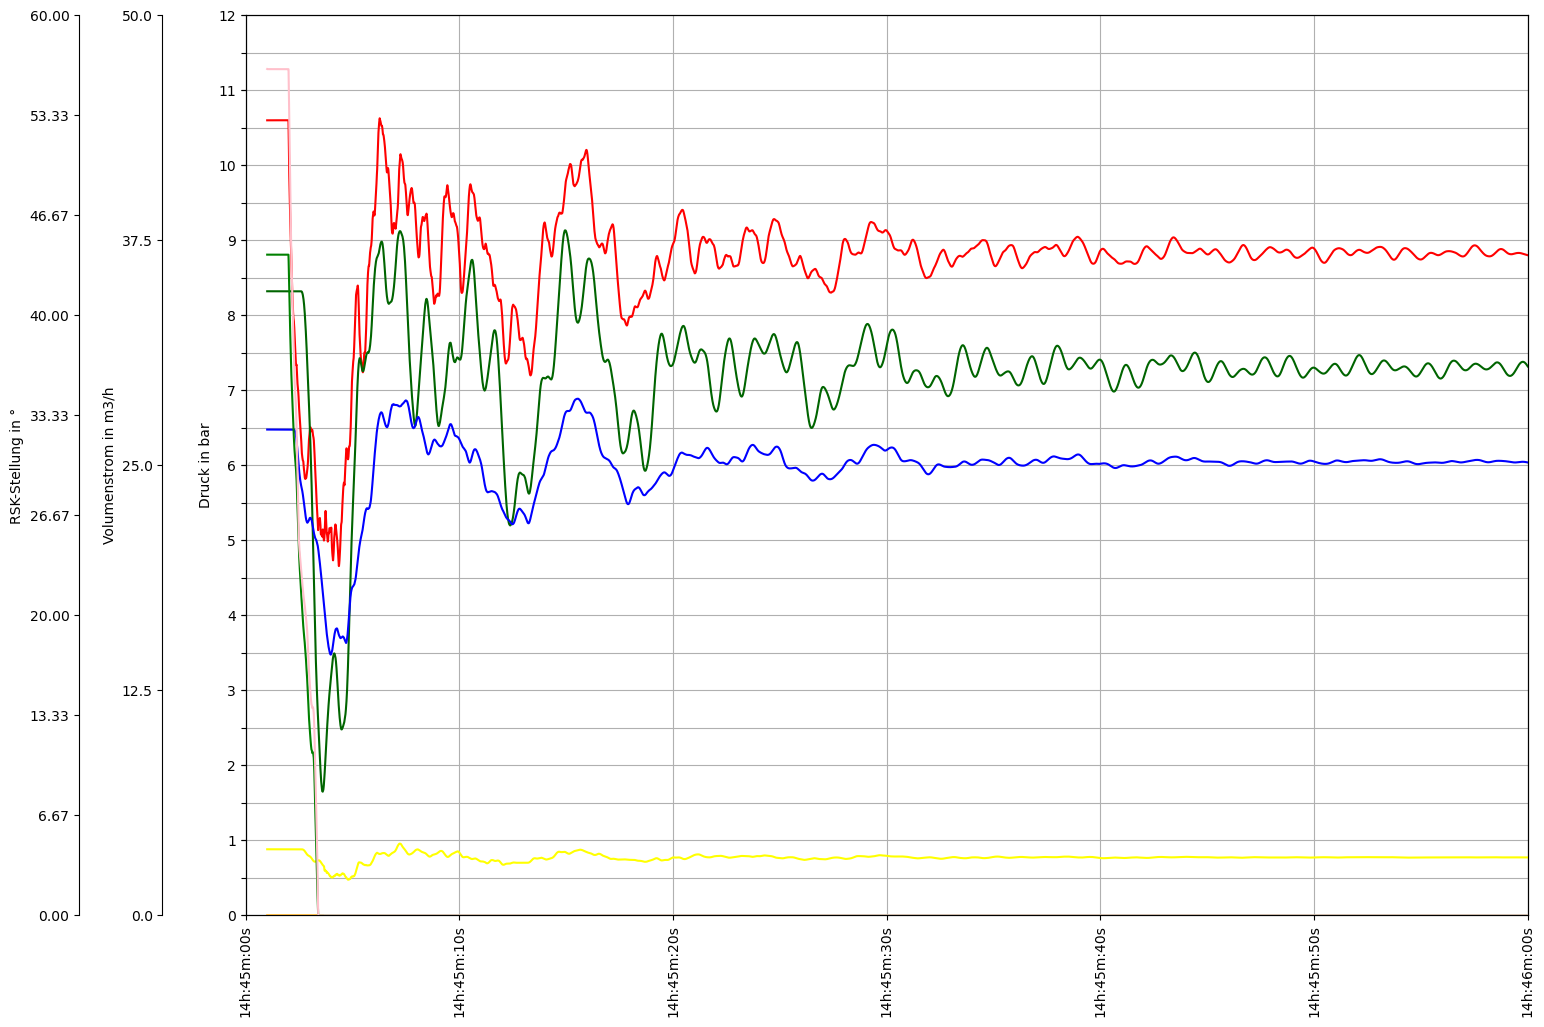

In [10]:
plot()

## Interactive Plot

In [11]:
Startzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 45),
    description='Startzeit:'
)

Endzeit_widget = widgets.TimePicker(
    value=datetime.time(14, 46),
    description='Endzeit:'
)

Druck = widgets.Checkbox(value=1,description='Druck')
Volumenstrom = widgets.Checkbox(value=1,description='Volumenstrom')
RSK_Stellung = widgets.Checkbox(value=1,description='RSK-Stellung')

In [12]:
def interaktive_grafik(Startzeit, Endzeit, Druck, Volumenstrom, RSK_Stellung):
                       
    fig, ax0 = plt.subplots(figsize=Rm.DINA3q)
    
    ax0.set_yticks(np.linspace(0, 24, 25))
    ax0.yaxis.set_ticklabels([])
    ax0.grid()

    i=0
    Achsen=[]
    
    if Druck == True:
        Achsen.append(1)
        i+=1
        ax1 = ax0.twinx()     
        fyP(ax1, (i-1)*60)
                
        ax1.plot(df.index, df['KNOT~K0011~~5471942051669438823~PH'], color='red')
        ax1.plot(df.index, df['KNOT~5143521_i~~5166327497394449628~PH'], color='darkgreen')
        ax1.plot(df.index, df['KNOT~791393_3_k~~5667818255300782920~PH'], color='blue')
        ax1.plot(df.index, df['KNOT~1629686_0_i~~5262999985134416180~PH'], color='yellow')
        
    if Volumenstrom == True:
        Achsen.append(2)
        i+=1
        Achsen.append(2)
        ax2 = ax0.twinx()     
        fyQ(ax2, (i-1)*60)
        ax2.plot(df.index, df['VENT~K0006~K0004~5659089154378919131~QM'], color='orange')
        ax2.plot(df.index, df['VENT~K0011~PST_out~5430537691154258843~QM'], color='green')
        
    if RSK_Stellung == True:
        Achsen.append(3)
        i+=1
        Achsen.append(3)
        ax3 = ax0.twinx()     
        fyRSK(ax3, (i-1)*60)
        ax3.plot(df.index, df['KLAP~K0013~K0014~5303247238968995258~PHI'], color='pink')
        
    # Set the x-axis limits
    Startzeit=datetime.datetime.combine(datetime.date(2020, 1, 28), Startzeit_widget.value)
    Endzeit=datetime.datetime.combine(datetime.date(2020, 1, 28), Endzeit_widget.value)


    ax0.set_xlim(Startzeit, Endzeit)

    Rm.pltHelperX(ax0, dateFormat='%Hh:%Mm:%Ss', bysecond=[0,10,20,30,40,50,60], yPos=0)
    
    plt.show()

In [13]:
widgets_interact = widgets.interactive(interaktive_grafik,
                                       Startzeit=Startzeit_widget, 
                                       Endzeit=Endzeit_widget,
                                       Druck=Druck,
                                       Volumenstrom=Volumenstrom,
                                       RSK_Stellung=RSK_Stellung)

In [14]:
def update_plot(change):
    plt.clf()
    interaktive_grafik(Druck=Druck.value, Volumenstrom=Volumenstrom.value, RSK_Stellung=RSK_Stellung.value,
                       Startzeit=Startzeit.value, Endzeit=Endzeit.value)

Startzeit_widget.observe(update_plot, names='value')
Endzeit_widget.observe(update_plot, names='value')
Druck.observe(update_plot, names='value')
Volumenstrom.observe(update_plot, names='value')
RSK_Stellung.observe(update_plot, names='value')

In [15]:
display(widgets_interact) #The display of the interactive plot does not work in the documentation, because a python kernel must run it. To view the interactive plot, download the script and run it.

interactive(children=(TimePicker(value=datetime.time(14, 45), description='Startzeit:', step=60.0), TimePicker…

In [16]:
dfDx=m.dx.dataFrames['SPLZ']